# **Day 5: K-Nearest Neighbors**
---
### **Description**
In this notebook, you will build a KNN (K-Nearest Neighbors) model. KNNs are a popular machine learning algorithm used for classification tasks. You'll get to see firsthand how KNN models work, and how they can be used to solve real-world problems.



### **Lab Structure**
* **Part 1**: [Spotify Dataset](#p1)

* **Part 2**: [Breast Cancer Dataset](#p2)




<br>

### **Learning Objectives**
 By the end of this lab, we will:
* Recognize how to implement KNN models with sklearn.
* Recognize how to change the K value for KNN models.



<br>

**Before starting, run the code below to import all necessary functions and libraries.**


In [ ]:
import warnings
warnings.filterwarnings('ignore')
!pip install matplotlib
!pip install pandas
!pip install scikit-learn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets

from sklearn import datasets, model_selection, metrics

<a name="p1"></a>

---
## **Part 1: Spotify Dataset**
---
#### **About the Dataset**
Spotify is one of the most popular digital music streaming services with over 515 million monthly users. The following dataset from Spotify data looks at different qualities of songs like energy, key, loudness, and tempo to see if a song is a top or bottom hit.

The features are as follows:
* `artist`: song artist(s)
* `song`: song title
* `duration_ms`: the track length in milliseconds (ms)
* `year`: the year the song was released
* `top half`: whether or not the song is in the top half of hits
* `danceability`: how suitable a track is for dancing (0.0: least danceable, 1.0: most danceable)
* `energy`: perceptual measure of intensity and activity (0.0 - 1.0)
* `key`: the key the track is in; integers map to pitches using standard Pitch Class notation (0: C, 1: C♯/D♭, 2:D, ..., 11: B)
* `loudness`: the overall loudness of a track in decibels (dB)
* `mode`: the modality of a track, or the type of scale from which its melodic content is derived (0: minor, 1: major)
* `speechiness`: a measure of the presence of spoken words in the track (0-0.33: music and other non-speech-like tracks, 0.33-0.66: contain both music and speech, 0.66-1.0: most likely made entirely of spoken words (e.g. talk show, audio book, poetry))
* `acousticness`: a confidence measure of whether or not the track is acoustic (0.0: low confidence, 1.0: high confidence)
* `instrumentalness`: predicts whether or not a track contains vocals (0.0: vocal content, 1.0: no vocal content)
* `liveness`: detects the presence of an audience in the recording ( > 0.8: strong likelihood the track was performed live)
* `valence`: musical positiveness conveyed by the track (lower valence: more negative, higher valence: more positive)
* `tempo`: the overall estimated tempo in beats per minute (BPM)
* `genre`: the genre in which the track belongs
* `explicit`: whether or not the song is explicit
* `explicity binary`: whether or not the song is explicit (0: no, 1: yes)

<br>

#### **Your Task**
Using the Spotify dataset, you will do the following:
* Create a KNN model that can predict whether a song will be a hit or a bust;
* Predict whether songs with various keys and energies will be hits or busts.

### **Step #1: Load the data**

Use the following code to load the dataset.

In [ ]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQJ9UIsI2j8vPnefdBj6GIrUGiDMsF5HRVAg4rsfaZqX5fAoTGLGydLvPXPQvE5ZSo9_aet1SC5UQji/pub?gid=1132556054&single=true&output=csv"
spotify_df = pd.read_csv(url)

spotify_df.head()

,artist,song,duration_ms,year,top half,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,explicit,explicity binary
0,Britney Spears,Oops!...I Did It Again,211160,2000,1,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop,False,0
1,blink-182,All The Small Things,167066,1999,1,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop",False,0
2,Faith Hill,Breathe,250546,1999,1,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country",False,0
3,Bon Jovi,It's My Life,224493,2000,1,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal",False,0
4,*NSYNC,Bye Bye Bye,200560,2000,1,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop,False,0


### **Step #2: Decide independent and dependent variables**

For this problem, we are interested in how the `key` and `energy` affect whether or not a song becomes a hit.

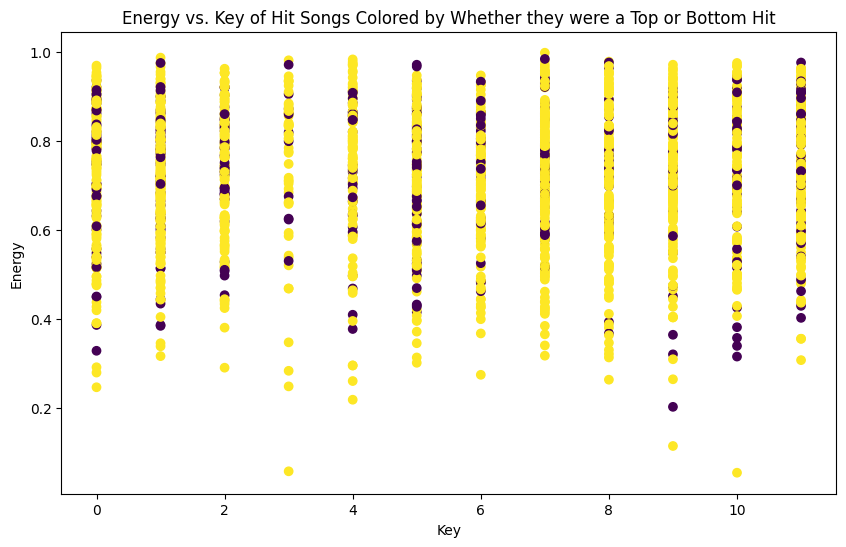

In [ ]:
features = spotify_df[['key', 'energy']]
label = spotify_df["top half"]

plt.figure(figsize=(10,6))
plt.scatter(features['key'], features['energy'], c = label)

# yellow: top hit, purple: bottom hit
plt.title("Energy vs. Key of Hit Songs Colored by Whether they were a Top or Bottom Hit")
plt.xlabel("Key")
plt.ylabel("Energy")

plt.show()

### **Step #3: Split data into training and testing data**



In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(features, label, test_size=0.2, random_state=42)

### **Step #4: Import the KNN algorithm**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

### **Step #5: Initialize the model and set hyperparameters**

Let's set the *hyperparameter* `n_neighbors = 1`.

In [ ]:
model = KNeighborsClassifier(n_neighbors = # COMPLETE THIS CODE)

### **Step #6: Train and test your model.**

In [ ]:
# train
model.fit(X_train, y_train)

# test
pred = model.predict(X_test)



**Run the code below to visualize the decision boundary of this KNN model.**


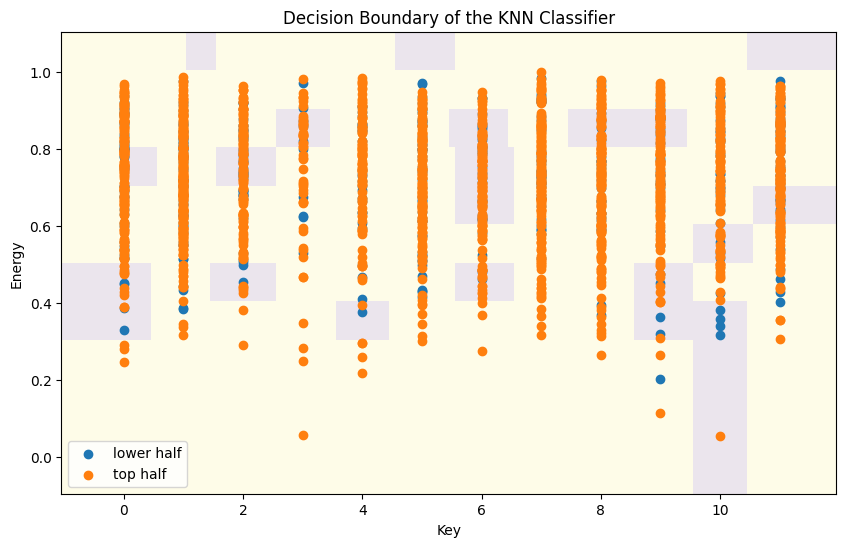

In [ ]:
# Make the same scatter plot of the training data

fig, ax = plt.subplots(figsize=(10,6))

xx, yy = np.meshgrid(np.arange(spotify_df['key'].min() - 1, spotify_df['key'].max() + 1, 0.1),
                     np.arange(spotify_df['energy'].min() - 0.1, spotify_df['energy'].max() + 0.1, 0.1))
z = model.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

ax.pcolormesh(xx, yy, z, alpha=0.1)

for label, data in spotify_df.groupby('top half'):
  ax.scatter(data["key"], data["energy"], label=['lower half', 'top half'][label])

ax.set_title("Decision Boundary of the KNN Classifier")
ax.set_xlabel("Key")
ax.set_ylabel("Energy")
ax.legend()
plt.show()

### **Step #7: Evaluate your model**



In [ ]:
print("Accuracy Score: ", metrics.accuracy_score(y_test, pred))

Accuracy Score:  0.695


### **Step #8: Use the model**

Use your model to predict whether the following songs are in the top hits.

1. We are given an song with `key = 3` and `energy = 0.8`. According to your KNN model, will this song be in the top half of hits?
2. We are given another song with `key = 4.5` and `energy = 0.45`. Will this song be a bust or a hit?
3. We are given an song with `key = 1` and `energy = 0.5`. Will this song be a bust or a hit?

In [ ]:
song = pd.DataFrame([[# COMPLETE THIS CODE]], columns = ["key", "energy"])
prediction = model.predict(song)
print(prediction)

In [ ]:
song = pd.DataFrame([[# COMPLETE THIS CODE]], columns = ["key", "energy"])
prediction = model.predict(song)
print(prediction)

In [ ]:
song = pd.DataFrame([[# COMPLETE THIS CODE]], columns = ["key", "energy"])
prediction = model.predict(song)
print(prediction)

### **Hyperparameter Tuning [OPTIONAL]**

Run the given code below to find the optimal k for our model. What is this k?

{1: 69.5, 3: 71.75, 5: 75.0, 7: 77.25, 9: 79.25, 11: 80.25, 13: 80.25, 15: 80.5, 17: 80.5, 19: 80.5, 21: 80.5, 23: 80.5, 25: 80.5, 27: 80.5, 29: 80.5, 31: 80.5, 33: 80.5, 35: 80.5, 37: 80.5, 39: 80.5, 41: 80.5, 43: 80.5, 45: 80.5, 47: 80.5, 49: 80.5}


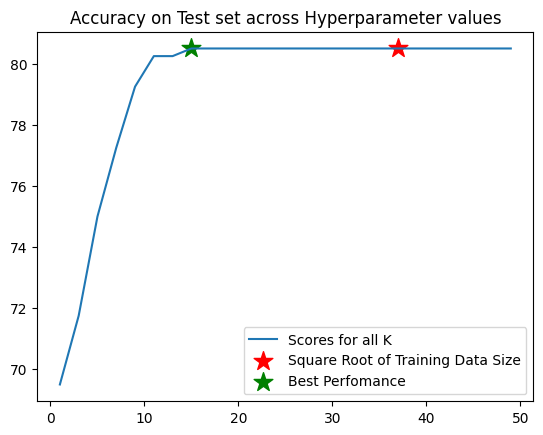

Top score of optimal classifier: 80.5
Best Value of N to use 15


In [ ]:
# Hyperparameter tuning
scores = {}
for n in range(1,50,2):
    full_model = KNeighborsClassifier(n_neighbors = n)
    full_model.fit(X_train, y_train.to_numpy().reshape(-1))
    pred = full_model.predict(X_test)
    score = sum(pred == y_test.to_numpy().reshape(-1))/len(pred)* 100
    scores[n] = score


plt.title("Accuracy on Test set across Hyperparameter values")
print(scores)
plt.plot(list(scores.keys()), list(scores.values()), label = 'Scores for all K')

# ADDING THE PERFORMANCE FOR K = SQRT SIZE FOR REFERENCE
k = int(len(X_train)**(1/2)/2)*2 - 1
full_model = KNeighborsClassifier(n_neighbors = k)
full_model.fit(X_train, y_train.to_numpy().reshape(-1))
pred = full_model.predict(X_test)
score = sum(pred == y_test.to_numpy().reshape(-1))/len(pred)* 100
plt.scatter([k], [score], color = 'r', marker = '*', s = 200, label = 'Square Root of Training Data Size')


top_score = max(scores.values())
best_k = list(scores.keys())[list(scores.values()).index(top_score)]
plt.scatter([best_k], [top_score], color = 'g', marker = '*', s = 200, label = 'Best Perfomance')

plt.legend()
plt.show()



# PRINTING THE RESULTS
print("Top score of optimal classifier: " + str(top_score))
print("Best Value of K to use " + str(best_k))

### **Reflection question**
Answer the following question: Do you think using only the two features `energy` and `key` is enough to predict whether or not a song will be a top hit?

<a name="p2"></a>

---
## **Part 2: Breast Cancer Dataset**
---

#### **About the Dataset**
Breast cancer is one of the most common types of cancer in women. Each year in the United States, about 264,000 women are diagnosed with breast cancer. The abilty to detect it early is extremely important. The following dataset is taken from the [UCI ML Breast Cancer Wisconsin (Diagnostic) dataset](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)). The dataset contains mammography exam results and whether or not cancer was detected.

The features are as follows:
* `radius`
* `texture`: standard deviation of gray-scale values
* `perimeter`
* `area`
* `smoothness`: local variations in radius lengths
* `compactness`: perimeter^2 / area - 1
* `concavity`: severity of concave portions of the contour
* `concave points`: number of concave portions of the contour
* `symmetry`
* `fractal dimension`: "coastline approximation" - 1

Note: There is data recorded for the mean, standard error, and worst (or largest) for each feature, resulting in 30 total features.

<br>

#### **Your Task**
Using the Breast Cancer dataset, we will do the following:
* Create a KNN classifier model that can be used to predict whether or not a patient has breast cancer.
* Use the model to predict whether or not patient have breast cancer based on various mean radii and mean textures.

<br>



### **Step #1: Load the data**

Use the following code to load the breast cancer dataset.


In [ ]:
cancer_dataset = datasets.load_breast_cancer()
df = pd.DataFrame(data=cancer_dataset.data, columns=cancer_dataset.feature_names)
df['TARGET'] = cancer_dataset.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,TARGET
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### **Step #2: Decide independent and dependent variables**

Run the cell below to select our features and label. In particular, we will fit our classifier using the `"mean radius"` and `"mean texture"` features in order to predict whether the patient has breast cancer.

In [ ]:
features = df[["mean radius","mean texture"]]
label = df['TARGET']

### **Before we continue our steps, let's visualize our data.**

Since we are building a classifier, it can be useful to look at some of the variables. Below we will look at `"mean radius"` and  `"mean texture"` and see if there appears to be a correlation with the detection of cancer.

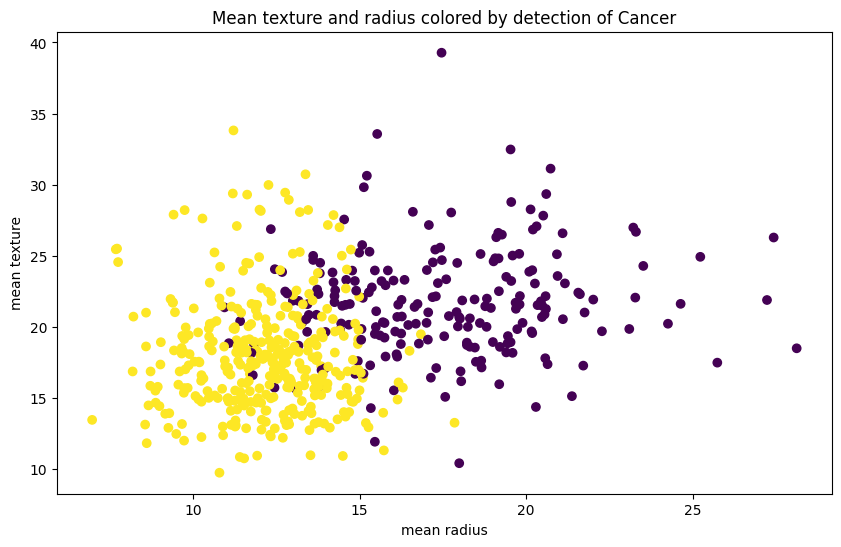

In [ ]:
plt.figure(figsize=(10,6))
scatter = plt.scatter(features['mean radius'], features['mean texture'], c=label)
plt.title("Mean texture and radius colored by detection of Cancer")
plt.xlabel("mean radius")
plt.ylabel("mean texture")
plt.show()
#yellow: breast cancer detected, purple: not detected

### **Step #3: Split data into training and testing data**

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(features, label, test_size=0.2, random_state=42)

### **Step #4: Import the KNN algorithm**

**Run the code below to complete this step.**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

### **Step #5: Initialize the model and set hyperparameters**


Let's set the *hyperparameter* `n_neighbors = 5`.

In [ ]:
model = KNeighborsClassifier(# COMPLETE THIS LINE

### **Step #6: Train and test your model.**

In [ ]:
# train
model.fit(X_train, y_train)

# test
pred = model.predict(X_test)

KNeighborsClassifier()

### **Create a visualization**

**Run the code below to visualize the decision boundary of this KNN model.**


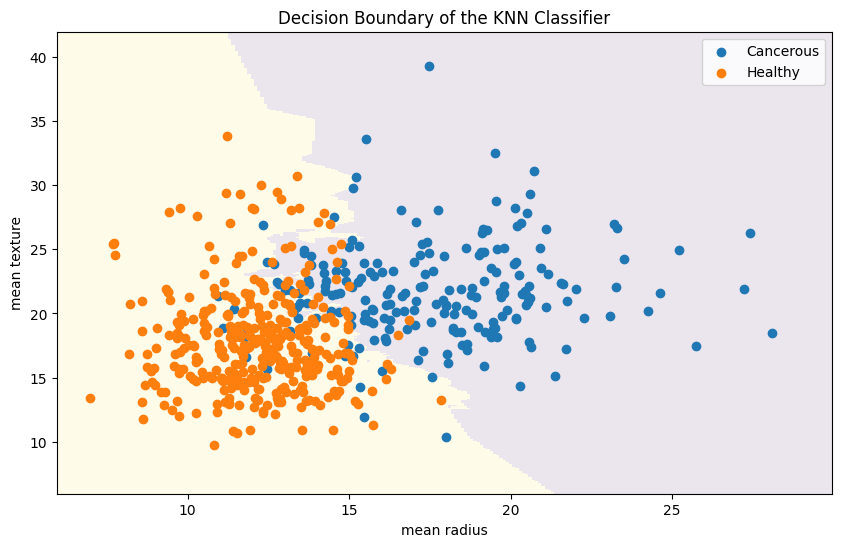

In [ ]:
# Make the same scatter plot of the training data

fig, ax = plt.subplots(figsize=(10,6))

xx, yy = np.meshgrid(np.arange(6, 30, 0.1),
                     np.arange(6, 42, 0.1))
z = model.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

ax.pcolormesh(xx, yy, z, alpha=0.1)

for label, data in df.groupby('TARGET'):
  ax.scatter(data["mean radius"], data["mean texture"], label=["Healthy","Cancerous"][label])

ax.set_title("Decision Boundary of the KNN Classifier")
ax.set_xlabel("mean radius")
ax.set_ylabel("mean texture")
ax.legend()
plt.show()

### **Step #7: Evaluate your model**



In [ ]:
print("Accuracy Score: ", metrics.accuracy_score(y_test, pred))

Accuracy Score:  0.9035087719298246


### **Step #8: Use the model**

Predict whether the following patients have cancer or not:

1. Is a patient with mean radius `15.5` and mean texture `31.2` likely to have cancer?
2. Is a patient with mean radius `12.2` and mean texture `34.5` likely to have cancer?



In [ ]:
patient1 = pd.DataFrame([[# FILL IN THIS CODE]], columns=["mean radius", "mean texture"])

prediction1 = model.predict(patient1)[0]

print("Patient 1 " + str(['is likely', 'is not likely'][prediction1]) + " to have cancer")

   mean radius  mean texture
0         15.5          31.2


In [ ]:
patient2 = pd.DataFrame([[# FILL IN THIS CODE]], columns=["mean radius", "mean texture"])

prediction2 = model.predict(patient2)[0]

print("Patient 2 " + str(['is likely', 'is not likely'][prediction2]) + " to have cancer")

### **Hyperparameter Tuning [OPTIONAL]**

Run the given code below to find the optimal k for our model. What is this k?

{1: 92.98245614035088, 3: 92.98245614035088, 5: 95.6140350877193, 7: 95.6140350877193, 9: 95.6140350877193, 11: 98.24561403508771, 13: 97.36842105263158, 15: 96.49122807017544, 17: 96.49122807017544, 19: 96.49122807017544, 21: 96.49122807017544, 23: 95.6140350877193, 25: 94.73684210526315, 27: 94.73684210526315, 29: 94.73684210526315, 31: 94.73684210526315, 33: 94.73684210526315, 35: 94.73684210526315, 37: 94.73684210526315, 39: 94.73684210526315, 41: 94.73684210526315, 43: 94.73684210526315, 45: 94.73684210526315, 47: 94.73684210526315, 49: 94.73684210526315}


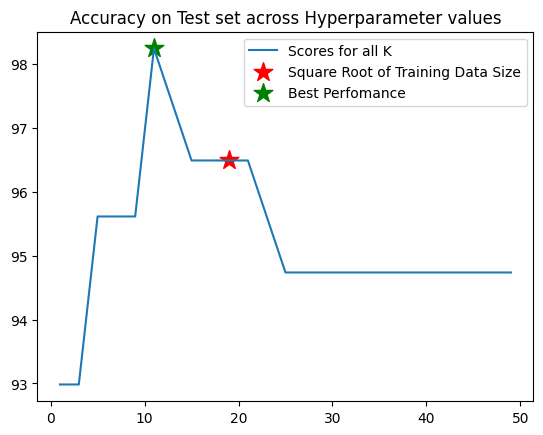

Top score of optimal classifier: 98.24561403508771
Best Value of N to use 11


In [ ]:
# Now lets see how accurate it is looking at all 30 variables

# Load all columns of the dataset
X_train, X_test, y_train, y_test = model_selection.train_test_split(df.drop(columns='TARGET'), df[['TARGET']],
                                      test_size=0.2, random_state=42)

# Hyperparameter tuning
scores = {}
for n in range(1,50,2):
    full_model = KNeighborsClassifier(n_neighbors = n)
    full_model.fit(X_train, y_train.to_numpy().reshape(-1))
    pred = full_model.predict(X_test)
    score = sum(pred == y_test.to_numpy().reshape(-1))/len(pred)* 100
    scores[n] = score


plt.title("Accuracy on Test set across Hyperparameter values")
print(scores)
plt.plot(list(scores.keys()), list(scores.values()), label = 'Scores for all K')

# ADDING THE PERFORMANCE FOR K = SQRT SIZE FOR REFERENCE
k = int(len(X_train)**(1/2)/2)*2 - 1
full_model = KNeighborsClassifier(n_neighbors = k)
full_model.fit(X_train, y_train.to_numpy().reshape(-1))
pred = full_model.predict(X_test)
score = sum(pred == y_test.to_numpy().reshape(-1))/len(pred)* 100
plt.scatter([k], [score], color = 'r', marker = '*', s = 200, label = 'Square Root of Training Data Size')


top_score = max(scores.values())
best_k = list(scores.keys())[list(scores.values()).index(top_score)]
plt.scatter([best_k], [top_score], color = 'g', marker = '*', s = 200, label = 'Best Perfomance')

plt.legend()
plt.show()



# PRINTING THE RESULTS
print("Top score of optimal classifier: " + str(top_score))
print("Best Value of K to use " + str(best_k))

### **Reflection question**
Answer the following question: In the case of predicting breast cancer, do you think it's more important to reduce false positives or false negatives?

---

# End of Notebook

© 2023 The Coding School, All rights reserved